In [103]:
#beria aysenur can
#090200705

In [104]:
import pandas as pd


In [105]:
data = pd.read_csv('datasets/data.csv')
data

,StudentID,MathGrade,PhysGrade,Score
0,0.0,85.532051,92.819089,92.0
1,1.0,98.453803,79.258914,77.5
2,2.0,81.775828,88.468591,83.0
3,3.0,100.000000,87.035252,83.5
4,4.0,52.704284,73.527331,72.5
...,...,...,...,...
96,96.0,70.416515,85.862217,80.0
97,97.0,100.000000,91.303496,85.5
98,98.0,0.000000,59.069523,57.0
99,99.0,93.191788,96.635709,96.0


/home/beria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/beria/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


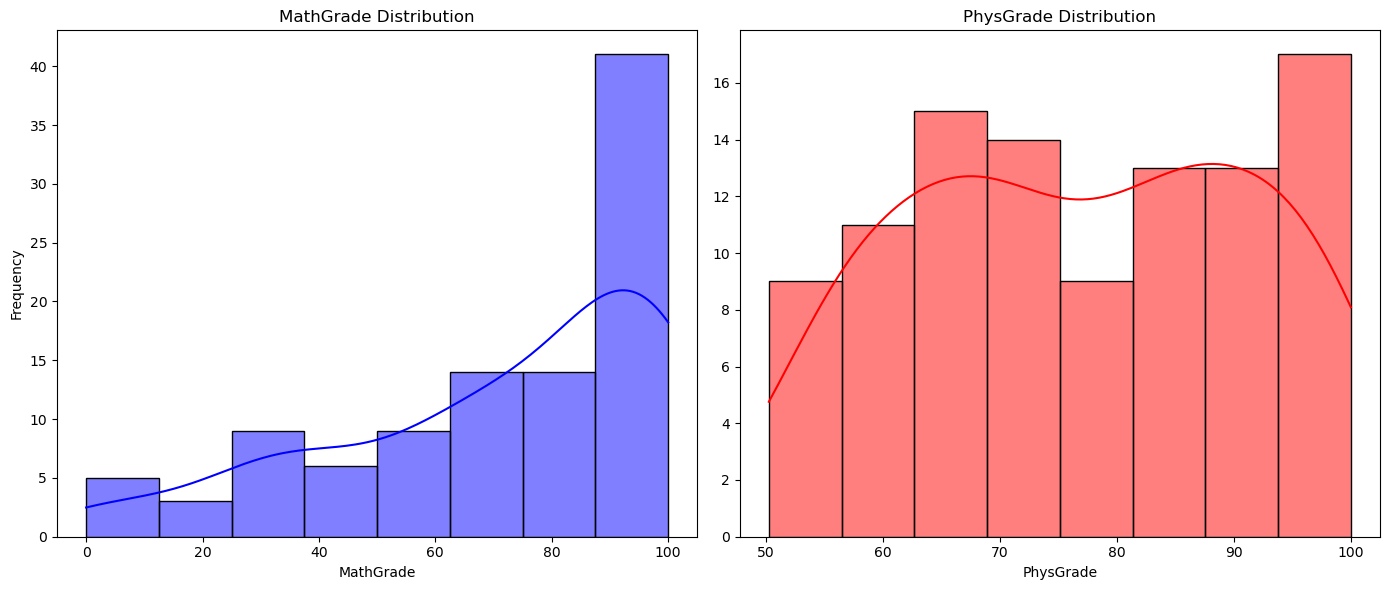

In [106]:
#Dağılımları inceleyelim

import matplotlib.pyplot as plt
import seaborn as sns

# Dağılımları inceleme
plt.figure(figsize=(14, 6))

# MathGrade dağılımı
plt.subplot(1, 2, 1)
sns.histplot(data['MathGrade'], kde=True, color='blue', edgecolor='black')
plt.title('MathGrade Distribution')
plt.xlabel('MathGrade')
plt.ylabel('Frequency')

# PhysGrade dağılımı
plt.subplot(1, 2, 2)
sns.histplot(data['PhysGrade'], kde=True, color='red', edgecolor='black')
plt.title('PhysGrade Distribution')
plt.xlabel('PhysGrade')
plt.ylabel('')

plt.tight_layout()
plt.show()


Burada Residueller gerçek değer ile tahmin edilen değer arasındaki farkı gösteriyor. Yani sapma miktarına ait bilgi içeriyor.

- Pozitif residüeller, öğrencinin notunun sınıfın genel ortalamasının üzerinde olduğunu gösterir. Bu, öğrencinin notunun, modelin (bu örnekte sınıfın ortalaması) tahmin ettiğinden daha yüksek olduğu anlamına gelir.
- Negatif residüeller, öğrencinin notunun sınıfın genel ortalamasının altında olduğunu gösterir. Bu, öğrencinin notunun, modelin tahmin ettiğinden daha düşük olduğu anlamına gelir.

In [107]:
from sklearn.utils.fixes import parse_version, sp_version

# This is line is to avoid incompatibility if older SciPy version.
# You should use `solver="highs"` with recent version of SciPy.
solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, QuantileRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Bağımsız değişkenler (X) ve bağımlı değişken (y)
X = data[['MathGrade']]
y = data['Score']

# Veri setini eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kuantilleri tanımlama ve tahminler için bir sözlük oluşturma
quantiles = [0.25, 0.5, 0.75]
predictions = {}

# Her kuantil için bir QuantileRegressor modeli oluşturma ve eğitme, solver olarak 'highs' kullanılarak
predictions_highs = {}

for q in quantiles:
    model = QuantileRegressor(quantile=q, alpha=0.01, solver='highs').fit(X_train, y_train)
    predictions_highs[f'Quantile {q}'] = model.predict(X_test)

predictions_highs


{'Quantile 0.25': array([62.45010891, 56.10800256, 71.03873464, 63.99665108, 68.00892135,
        53.12832611, 54.32166395, 73.5       , 54.64885241, 70.0136013 ,
        65.46263698, 57.78248073, 73.5       , 59.61436013, 72.9635393 ,
        62.10296483, 73.3572988 , 65.19630159, 73.23290036, 73.46599917,
        66.71704949]),
 'Quantile 0.5': array([72.16192824, 64.79204615, 82.14239145, 73.9590967 , 78.62157904,
        61.32949555, 62.71622083, 85.00251938, 63.09643211, 80.95112921,
        75.66265426, 66.73788339, 85.00251938, 68.86662965, 84.37912206,
        71.75852742, 84.83669262, 75.35315765, 84.69213467, 84.96300852,
        77.12035172]),
 'Quantile 0.75': array([78.82503627, 69.01451266, 92.11067213, 81.21736268, 87.4238925 ,
        64.40528907, 66.25124819, 95.9179722 , 66.75737186, 90.52490642,
        83.48507761, 71.60474164, 95.9179722 , 74.43845256, 95.08812797,
        78.28804351, 95.69722953, 83.07308678, 95.50479917, 95.86537675,
        85.42551236])}

In [109]:
# Tahmin sonuçlarını ve gerçek değerleri DataFrame'e dönüştürme
predictions_df = pd.DataFrame(predictions_highs)
predictions_df['True Score'] = y_test.reset_index(drop=True)

# Tahmin sonuçlarını ve gerçek değerleri gösterme
predictions_df.head()

,Quantile 0.25,Quantile 0.5,Quantile 0.75,True Score
0,62.450109,72.161928,78.825036,64.5
1,56.108003,64.792046,69.014513,69.0
2,71.038735,82.142391,92.110672,84.0
3,63.996651,73.959097,81.217363,73.0
4,68.008921,78.621579,87.423893,63.5


In [110]:
# Bağımsız değişkenler (X) ve bağımlı değişken (y)
X = data[['MathGrade']]
y = data['Score']

# Veri setini eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineer regresyon modeli oluşturma ve eğitme
lr_model = LinearRegression().fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Quantile Regressor modeli için tahminler zaten yapıldı ve predictions_df'de saklandı.
# MAE ve MSE hesaplama
# Lineer Regresyon için
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)

# Quantile Regressor için (ortanca tahmin için - quantile 0.25)
qr_mae_025 = mean_absolute_error(y_test, predictions_df['Quantile 0.25'])
qr_mse_025= mean_squared_error(y_test, predictions_df['Quantile 0.25'])

# Quantile Regressor için (ortanca tahmin için - quantile 0.5)
qr_mae_05 = mean_absolute_error(y_test, predictions_df['Quantile 0.5'])
qr_mse_05= mean_squared_error(y_test, predictions_df['Quantile 0.5'])

# Quantile Regressor için (ortanca tahmin için - quantile 0.75)
qr_mae_075 = mean_absolute_error(y_test, predictions_df['Quantile 0.75'])
qr_mse_075= mean_squared_error(y_test, predictions_df['Quantile 0.75'])

(lr_mae, lr_mse, qr_mae_05, qr_mse_05)


(6.730141024632345, 69.9286211947515, 6.353913960698565, 69.8358431707708)

In [111]:
qr_mae_025, qr_mse_025

(10.804651639892327, 163.65746742318842)

In [112]:
qr_mae_075, qr_mse_075

(9.084632042488842, 132.98658931078918)

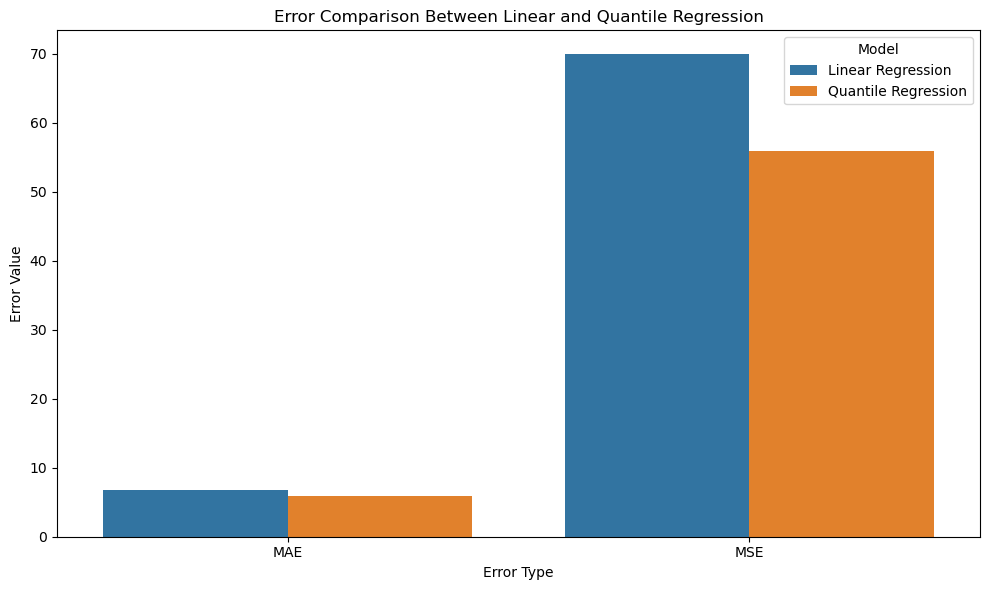

In [113]:
# Hata metriklerini görselleştirme
errors = pd.DataFrame({
    'Error Type': ['MAE', 'MSE'],
    'Linear Regression': [lr_mae, lr_mse],
    'Quantile Regression': [qr_mae, qr_mse]
}).melt(id_vars='Error Type', var_name='Model', value_name='Error Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Error Type', y='Error Value', hue='Model', data=errors)
plt.title('Error Comparison Between Linear and Quantile Regression')
plt.ylabel('Error Value')
plt.xlabel('Error Type')
plt.tight_layout()
plt.show()

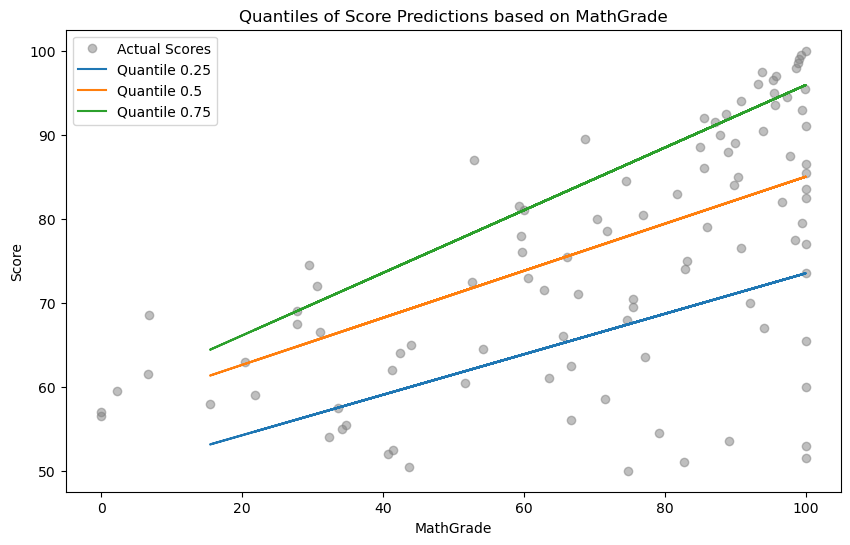

In [114]:
# Veri setindeki 'MathGrade' sütununu x olarak ve 'Score' sütununu y olarak kullanacağız
# Bu sefer, Quantile Regressor'un tahminlerini görselleştireceğiz

plt.figure(figsize=(10, 6))

# Gerçek değerlerin ortalaması
plt.plot(X, y, 'o', color="grey", alpha=0.5, label="Actual Scores")

# Farklı quantile tahminlerini çizme
for quantile, prediction in predictions_highs.items():
    plt.plot(X_test, prediction, label=f"{quantile}")

plt.legend()
plt.xlabel("MathGrade")
plt.ylabel("Score")
plt.title("Quantiles of Score Predictions based on MathGrade")
plt.show()
